<a href="https://colab.research.google.com/github/codedbyevan/student_performance_prediction/blob/main/notebooks/03_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

In [2]:
# Read processed data
url = "https://raw.githubusercontent.com/codedbyevan/student_performance_prediction/refs/heads/main/data/processed/processed_data.csv"
df_raw = pd.read_csv(url)
df = df_raw.copy()

In [3]:
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [4]:
# Split training and testing dataset
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9889832909573145
MAE: 1.6111213463123044
RMSE: 2.0205515085050054


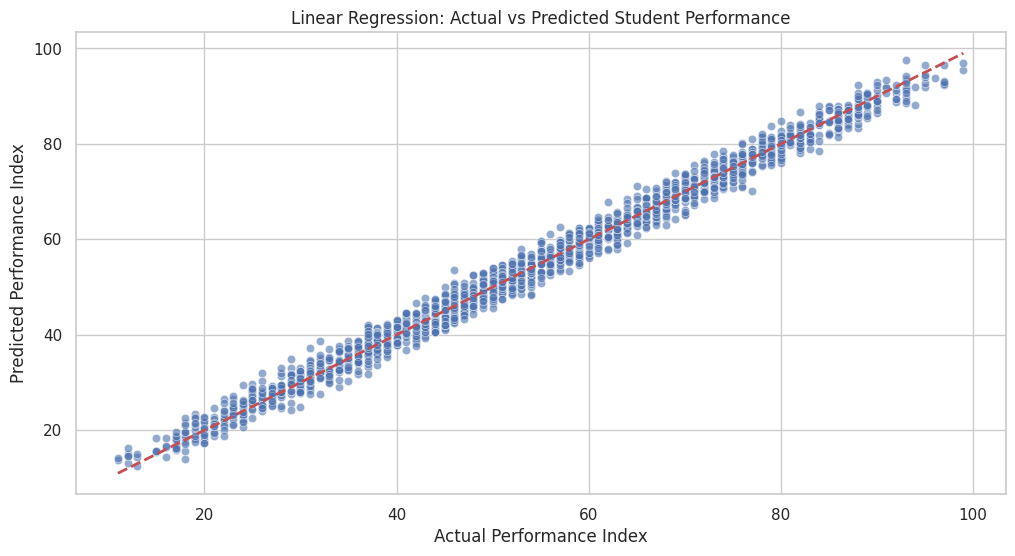

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Linear Regression: Actual vs Predicted Student Performance")
plt.show()

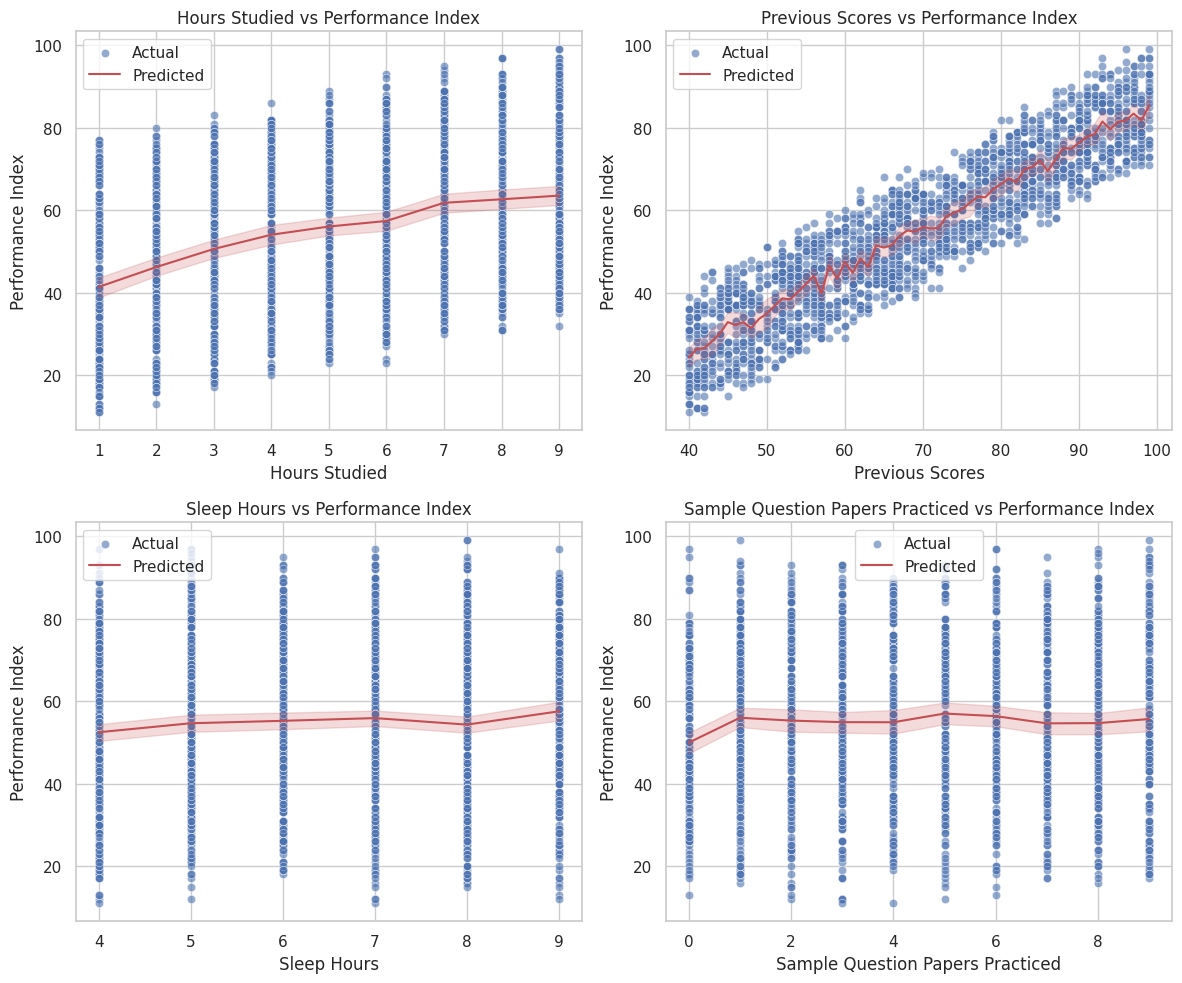

In [17]:
features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    # Sort by feature value (for smooth line)
    sorted_idx = X_test[feature].argsort()
    x_sorted = X_test[feature].iloc[sorted_idx]
    y_true_sorted = y_test.iloc[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]

    # Scatter actual values
    sns.scatterplot(x=x_sorted, y=y_true_sorted, alpha=0.6, ax=axes[i], label='Actual')

    # Line: model’s prediction
    sns.lineplot(x=x_sorted, y=y_pred_sorted, color='r', label='Predicted', ax=axes[i])

    axes[i].set_title(f"{feature} vs Performance Index")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Performance Index")

plt.tight_layout()
plt.show()